# Dependencies

In [1]:
pip install pandas

In [2]:
pip install numpy

In [3]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 38.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
pip install mpl-toolkits.clifford

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.3/159.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 8.8 MB/s eta 0:00:00


In [1]:
pip install matplotlib

In [2]:
pip install seaborn

# Import required elements

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns

# Feature Engineering

In [4]:
# Load the dataset
df = pd.read_csv('./sample_data/cars.csv', usecols=['odometer_value', 'year_produced', 'price_usd'])

# Remove rows with NaN in any column
df = df.dropna().copy()

# Print the first rows of the data frame
df.head()

,odometer_value,year_produced,price_usd
0,190000,2010,10900.00
1,290000,2002,5000.00
2,402000,2001,2800.00
3,10000,1999,9999.00
4,280000,2001,2134.11


<Axes: xlabel='year_produced', ylabel='odometer_value'>

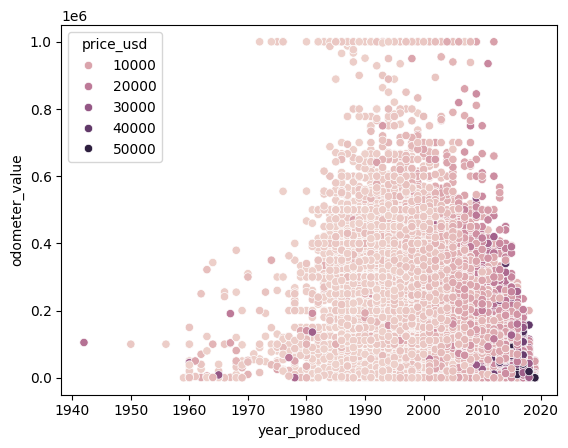

In [5]:
sns.scatterplot(data = df, x = 'year_produced', y = 'odometer_value', hue = 'price_usd')

In [6]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(df[['odometer_value', 'year_produced', 'price_usd']])
df_normalized = scaler.transform(df[['odometer_value', 'year_produced', 'price_usd']])
print(df_normalized[:5])

[[-0.43260362  0.87485665  0.66272301]
 [ 0.30230894 -0.11700687 -0.25512656]
 [ 1.125411   -0.24098981 -0.59737555]
 [-1.75544621 -0.48895569  0.52255649]
 [ 0.22881768 -0.24098981 -0.70096654]]


# K-Means Algorithm

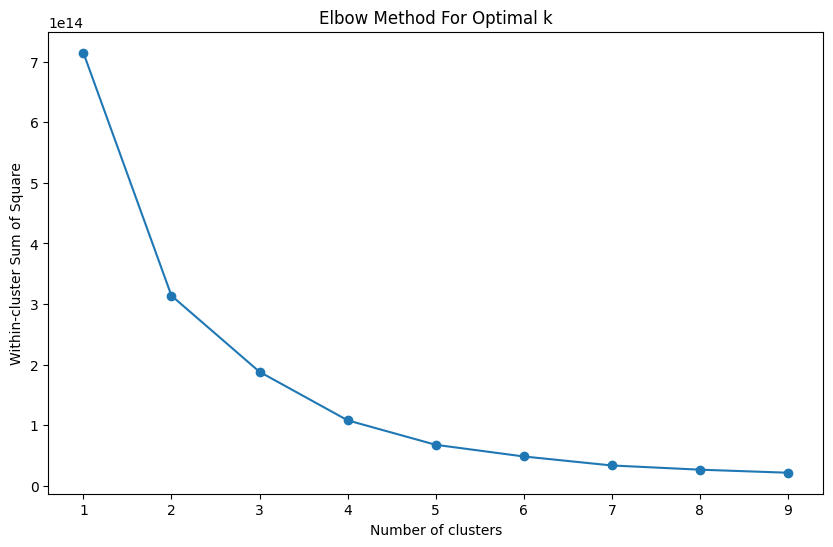

In [9]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init = 'auto')
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)# Plot the elbow graph

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

In [10]:
# Elbow is at three clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(df_normalized)

# Adjusting clusters
adj_clusters = [x + 1 for x in clusters]

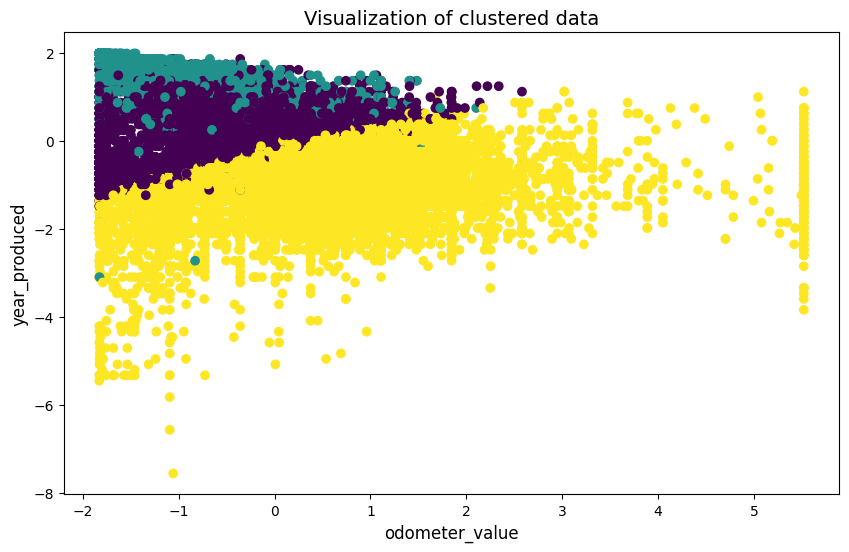

In [11]:
 # Choose two dimensions to plot (e.g., odometer_value and year_produced)
plt.figure(figsize=(10, 6))
plt.scatter(df_normalized[:,0], df_normalized[:,1], c=adj_clusters, cmap='viridis', marker='o')
plt.title('Visualization of clustered data', fontsize=14)
plt.xlabel('odometer_value', fontsize=12)
plt.ylabel('year_produced', fontsize=12)
plt.show()

In [12]:
# Adding cluster column to the dataframe
df['cluster'] = adj_clusters

# Now let's see the first 5 instances of the updated dataset
print(df.head(10))

   odometer_value  year_produced  price_usd  cluster
0          190000           2010   10900.00        1
1          290000           2002    5000.00        3
2          402000           2001    2800.00        3
3           10000           1999    9999.00        1
4          280000           2001    2134.11        3
5          132449           2011   14700.00        2
6          318280           1998    3000.00        3
7          350000           2004    4500.00        3
8          179000           2010   12900.00        1
9          571317           1999    4200.00        3


In [14]:
# Load the original dataset (copy)
df_new = pd.read_csv('./sample_data/cars.csv')

# Remove rows with NaN in specific columns to match the original dataframe
columns_to_check = ['odometer_value', 'year_produced', 'price_usd']
df_new = df_new.dropna(subset=columns_to_check).copy()

# Map the cluster number to a meaning
cluster_names_map = {
    1: 'Normal',
    2: 'Recent',
    3: 'Classic'
}

# Create a new column with the cluster name
df_new['cluster'] = pd.Series(adj_clusters).map(cluster_names_map)

# Print the first rows of the data frame
df_new.head(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,cluster
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,False,True,False,True,True,True,16,Normal
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,False,True,True,False,False,False,True,83,Classic
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,False,False,True,True,151,Classic


<Axes: xlabel='year_produced', ylabel='odometer_value'>

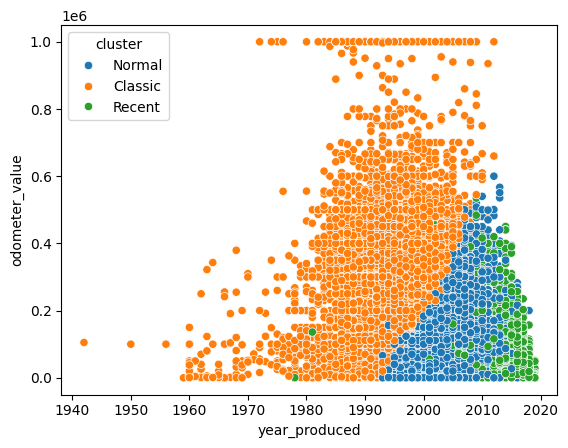

In [15]:
sns.scatterplot(data = df_new, x = 'year_produced', y = 'odometer_value', hue = 'cluster')

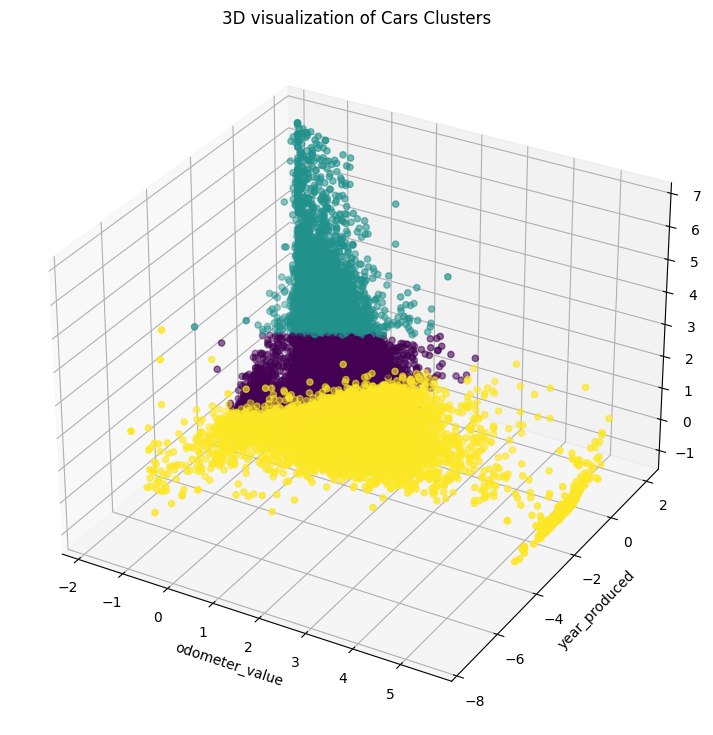

In [16]:
# Create a 3D figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three features of the Cars dataset
ax.scatter(df_normalized[:,0],  # Odometer_value
           df_normalized[:,1],  # year_produced
           df_normalized[:,2],  # price_usd
           c=adj_clusters,      # Use cluster labels as color encoding
           cmap='viridis',
           marker='o')

# Set labels according to the features we used
ax.set_xlabel('odometer_value')
ax.set_ylabel('year_produced')
ax.set_zlabel('price_usd')

# Title of the plot
ax.set_title('3D visualization of Cars Clusters')

# Show the plot
plt.show()

# Bibliography

[Introduction to k-Means Clustering with scikit-learn in Python](https://www.datacamp.com/tutorial/k-means-clustering-python)

[Supervised-and-Unsupervised-Learning-Examples](https://github.com/andre1araujo/Supervised-and-Unsupervised-Learning-Examples/blob/main/ML_Notebook.ipynb)

[Supervised Vs. Unsupervised Machine Learning](https://clickup.com/blog/supervised-vs-unsupervised-machine-learning/?utm_source=google-pmax&utm_medium=cpc&utm_campaign=gpm_cpc_ar_nnc_pro_trial_all-devices_tcpa_lp_x_all-departments_x_pmax&utm_content=&utm_creative=_____&gad_source=1&gclid=Cj0KCQjwpZWzBhC0ARIsACvjWROipfBFkemiZ8exCUfSNyEDjsajFYY0w2Kv0iAY_Lpnnk1pZ39rewIaAhfBEALw_wcB)

[Used-cars-catalog](https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog)